In [21]:
# from itertools import chain
# from itertools import product
import numpy as np
import anndata as ad
import pandas as pd
import scanpy as sc
# import scanpy.external as sce
# import scvelo as scv
# import cellrank as cr
# import harmonypy as harmony
# import seaborn as sns
# from scipy import io
# from scipy import sparse

In [22]:
import os
os.chdir('/local/workdir/dwm269/scCardiacOrganoid/')

In [23]:
from scripts.py.scantils import *
# from scripts.py.scanplots import *

Load data

In [24]:
adata = sc.read_h5ad(
    filename="data/pyobjs/scCO_v1b.h5ad" 
)

# Run PAGA

In [25]:
sc.pp.neighbors(
    adata,
    n_neighbors=100,
    n_pcs=50,#npcs(adata,reduction="harmony_sp"),
    use_rep="harmony_sp",
    key_added="harmony_sp_neighbors"
)

/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
sc.tl.paga(
    adata,
    groups='cell_types_level2',
    neighbors_key='harmony_sp_neighbors'
)

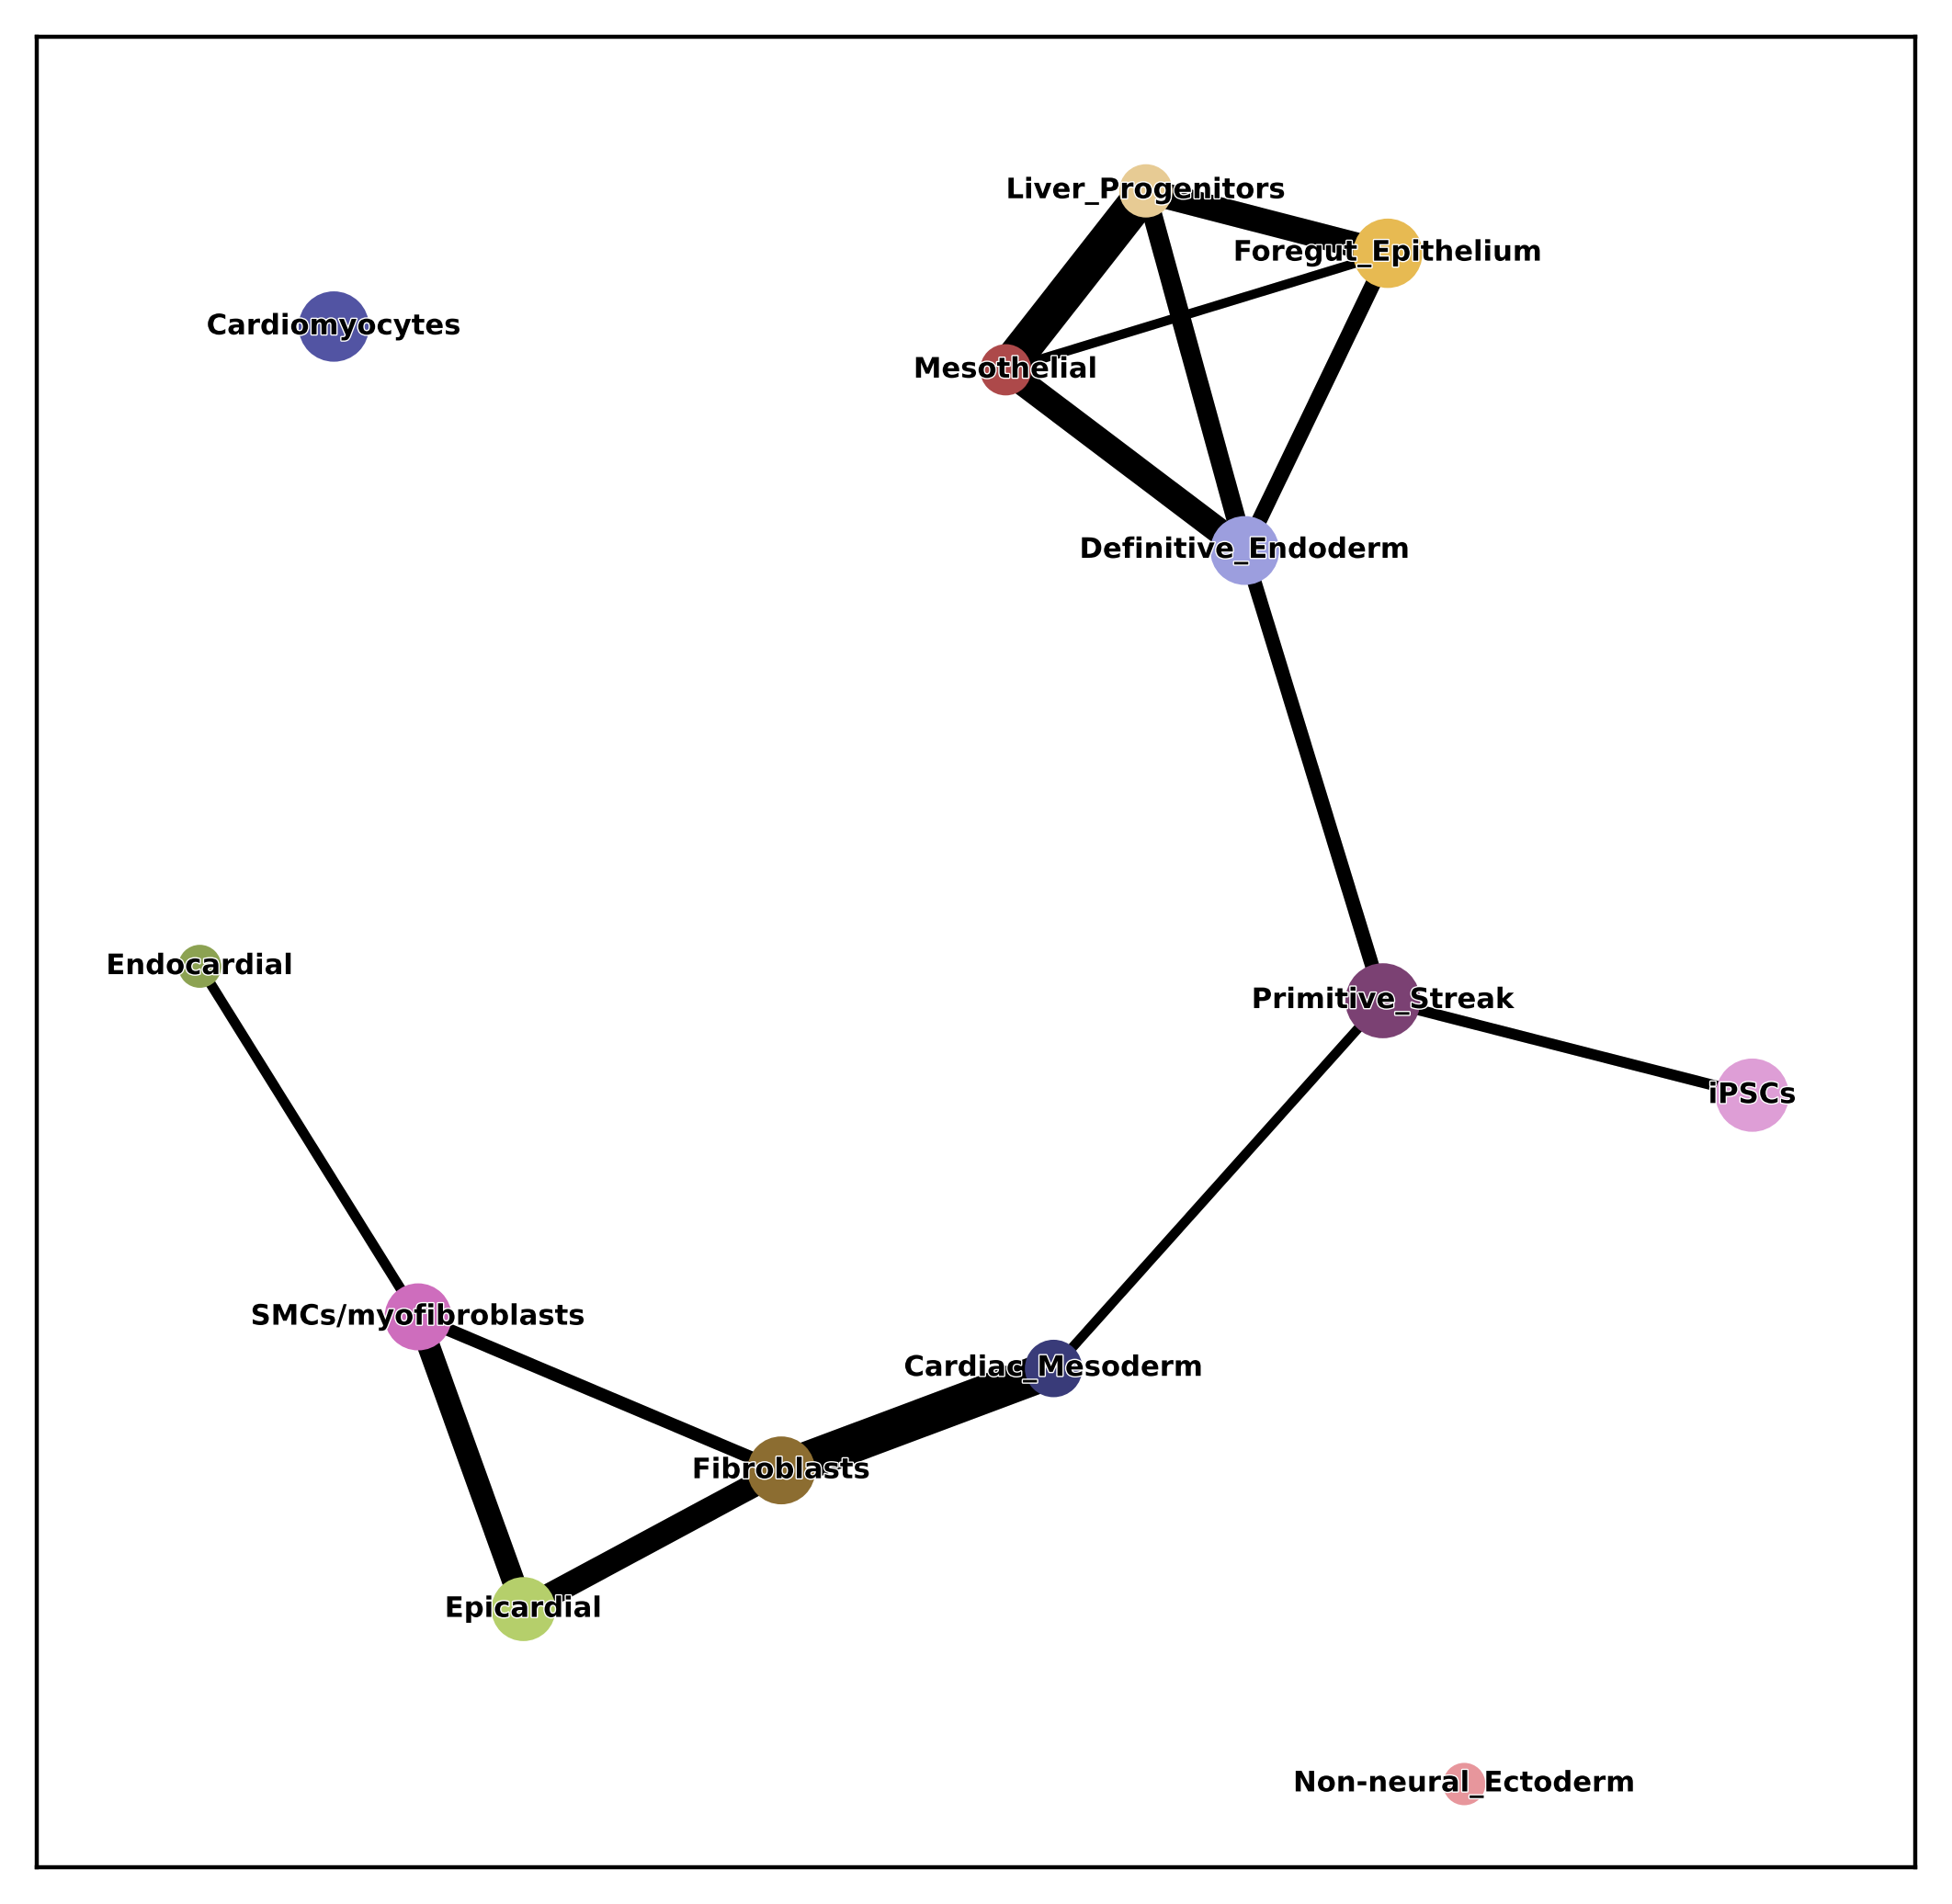

In [27]:
sc.set_figure_params(
    figsize=(6,6),
    fontsize=6,
    transparent=True,
    dpi=200
)
sc.pl.paga(
    adata, 
    color=['cell_types_level2'],
    threshold=0.1,
    # normalize_to_color =True,
    dashed_edges ="connectivities",
    fontoutline=0.5
)

/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


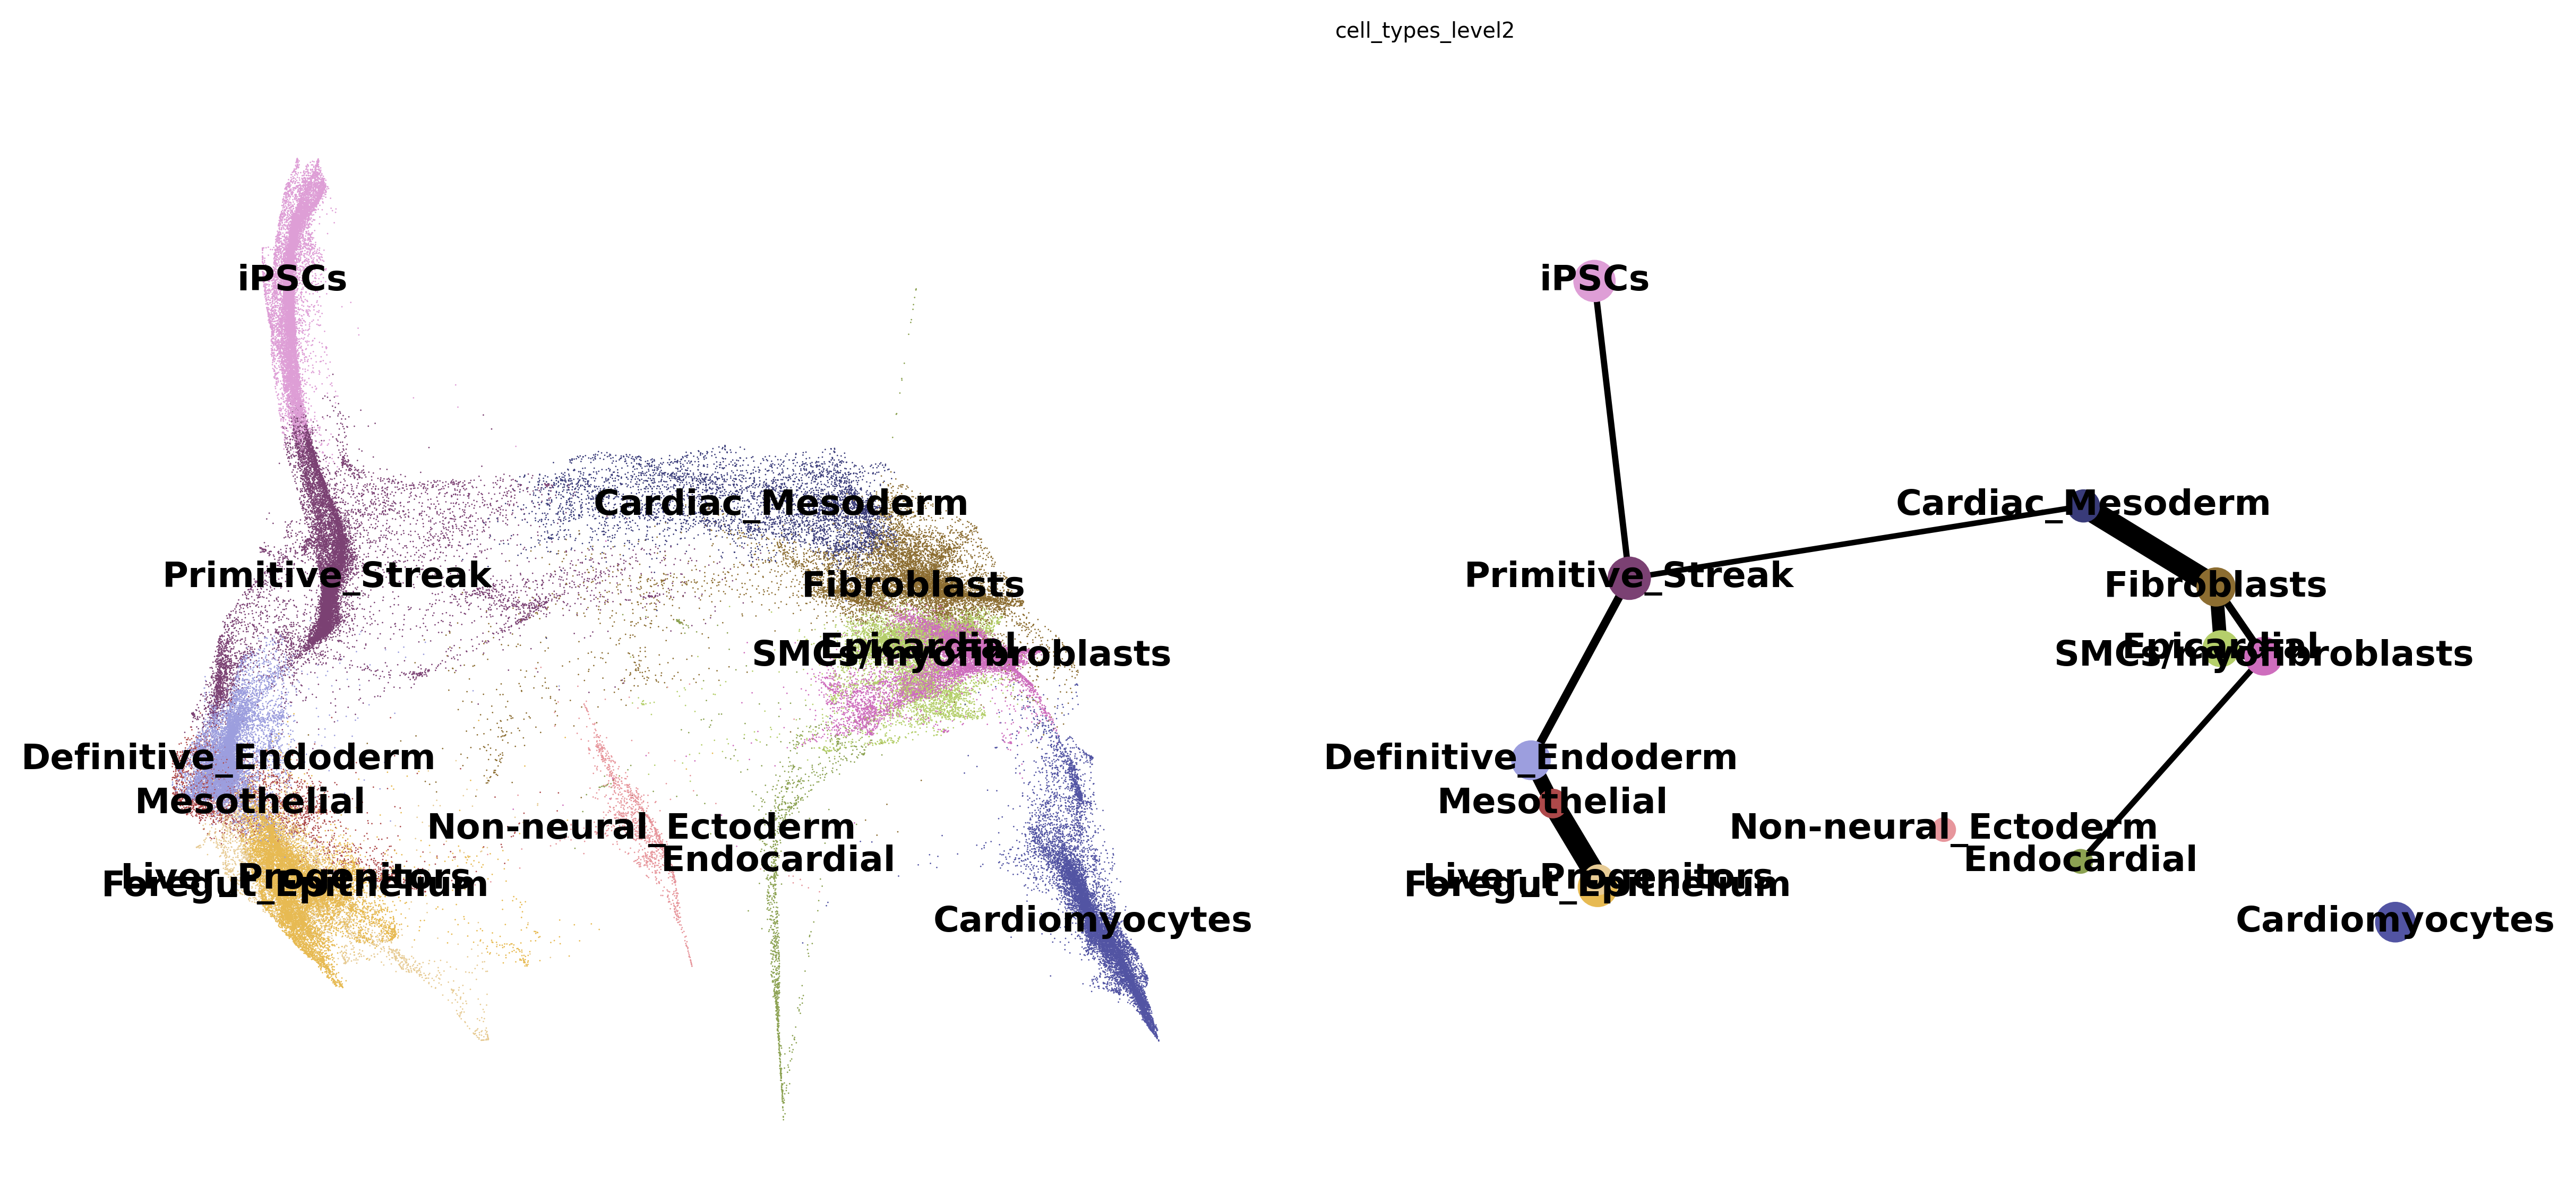

In [28]:
sc.pl.paga_compare(
    adata, 
    basis='phate_harmony_sp',
    threshold=0.1,
    right_margin=0.2, 
    size=1, 
    legend_fontsize=12, fontsize=12, 
    frameon=False, edges=False,
    # edge_width_scale=0.1,
    save=True
)

In [29]:
sc.tl.diffmap(
    adata, 
    neighbors_key='harmony_sp_neighbors'
)

In [30]:
sc.tl.draw_graph(
    adata, 
    neighbors_key='harmony_sp_neighbors',
    layout='fa', 
    init_pos='paga'
)

Compute pseudotime with `dpt`

In [31]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['cell_types_level2']  == 'iPSCs')[0]

In [32]:
sc.tl.dpt(
    adata,
    # n_branchings=1,
    neighbors_key='harmony_sp_neighbors'
)

/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


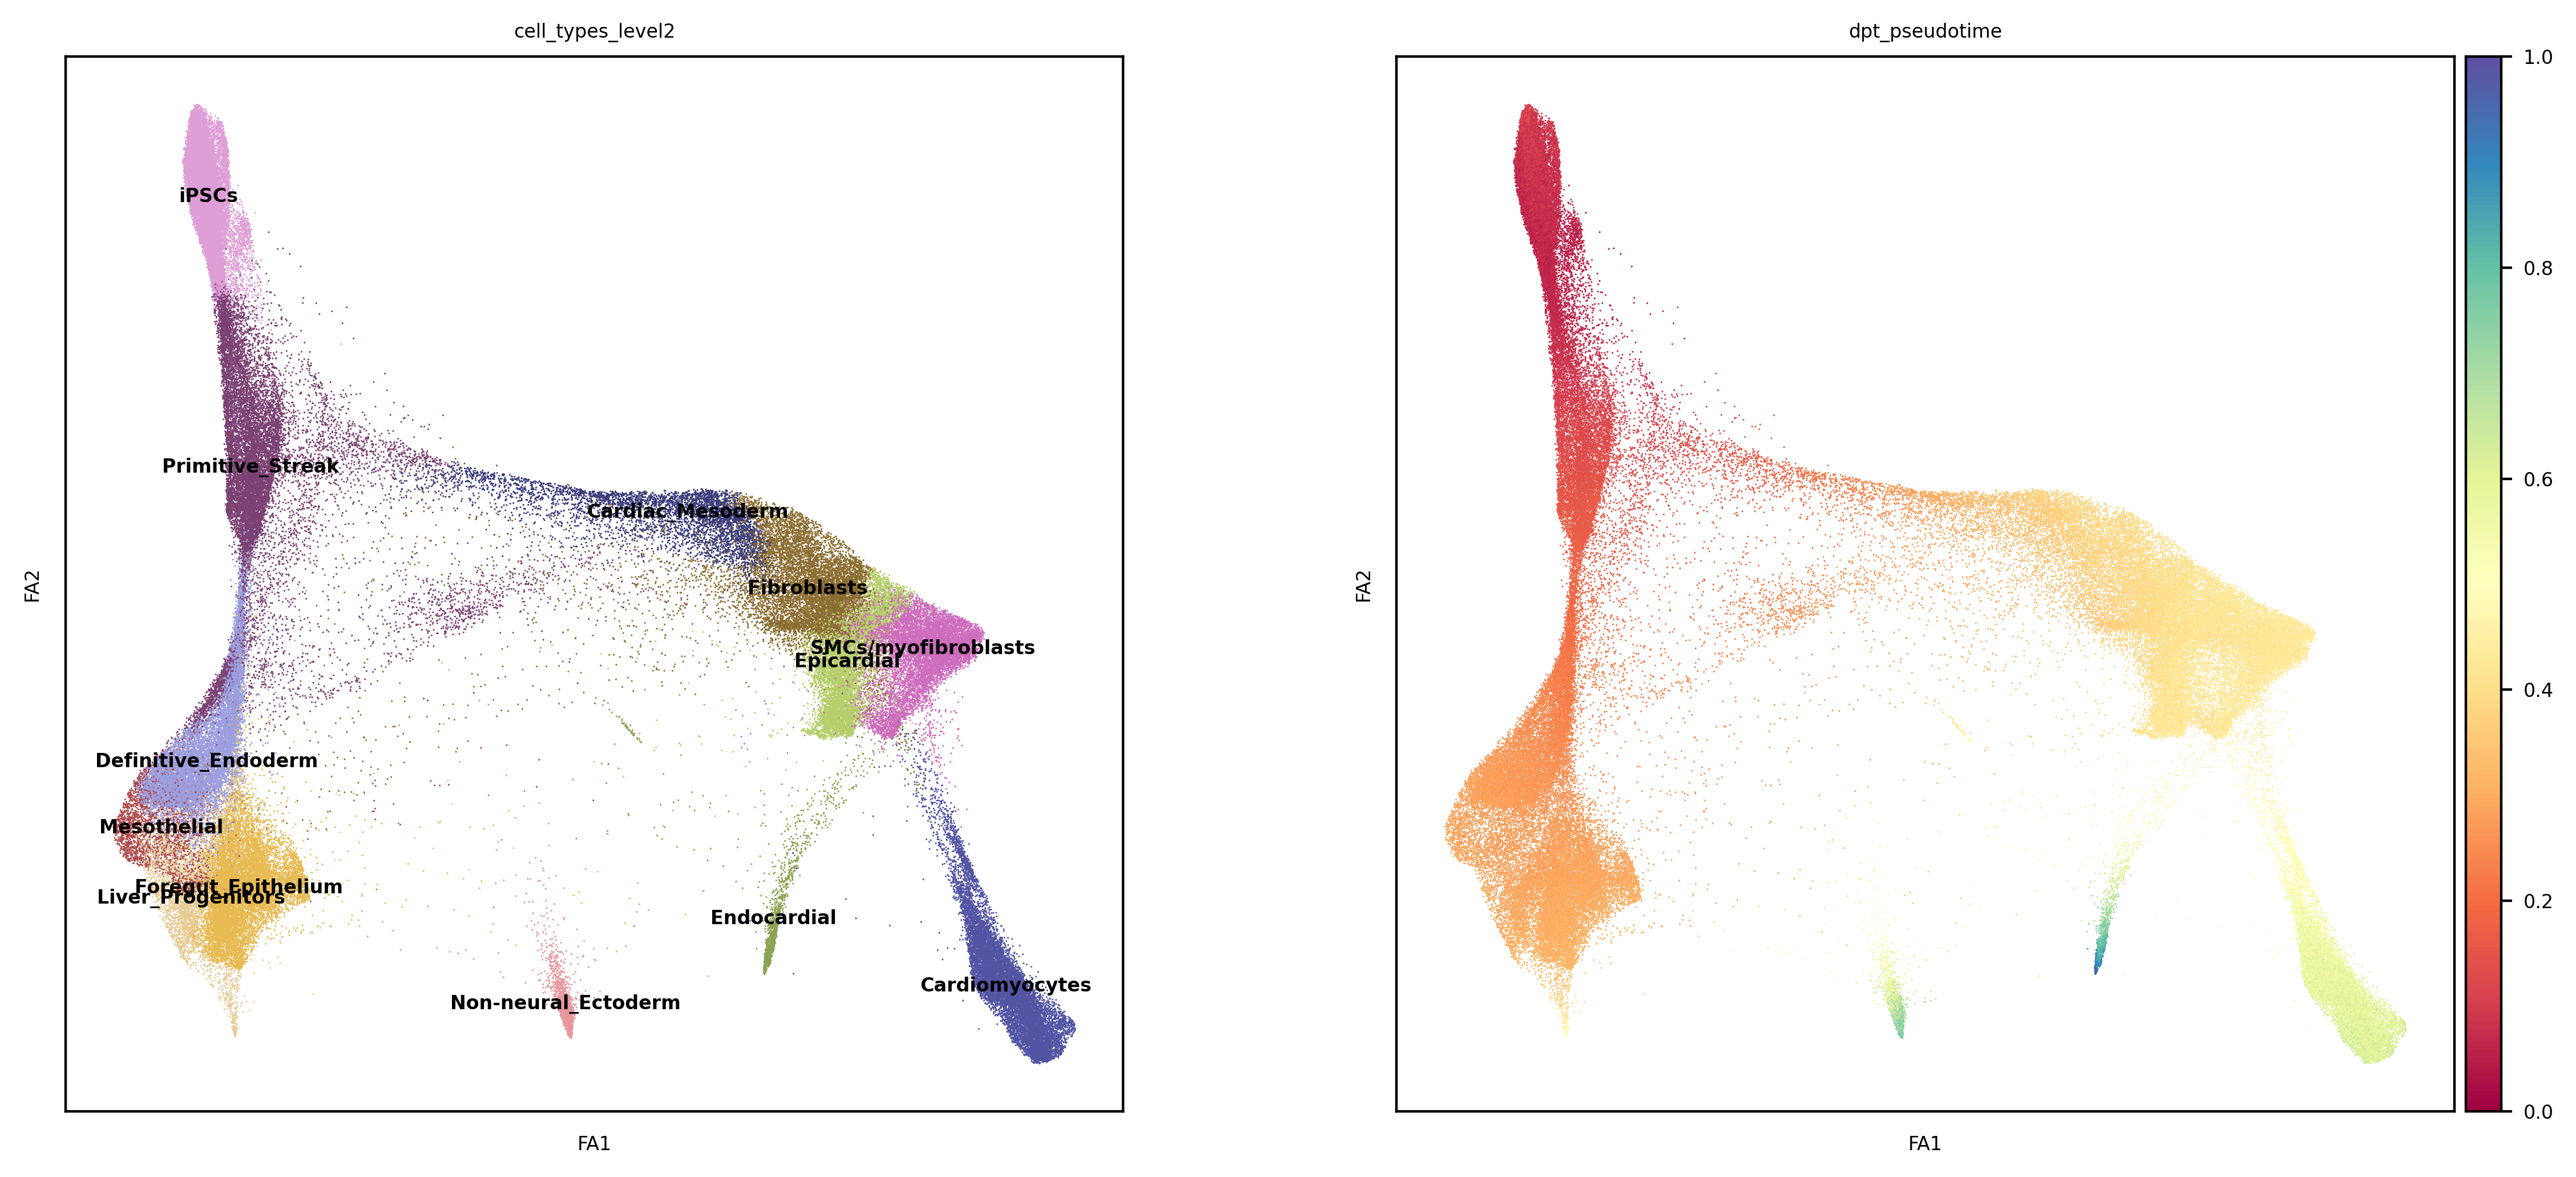

In [33]:
sc.pl.draw_graph(
    adata, color=['cell_types_level2', 'dpt_pseudotime'], 
    cmap = 'Spectral',
    legend_loc='on data'
)

Re-draw PHATE embedding w/ PAGA & pseudotime info

/home/dwm269/miniconda3/envs/pyRNA6/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


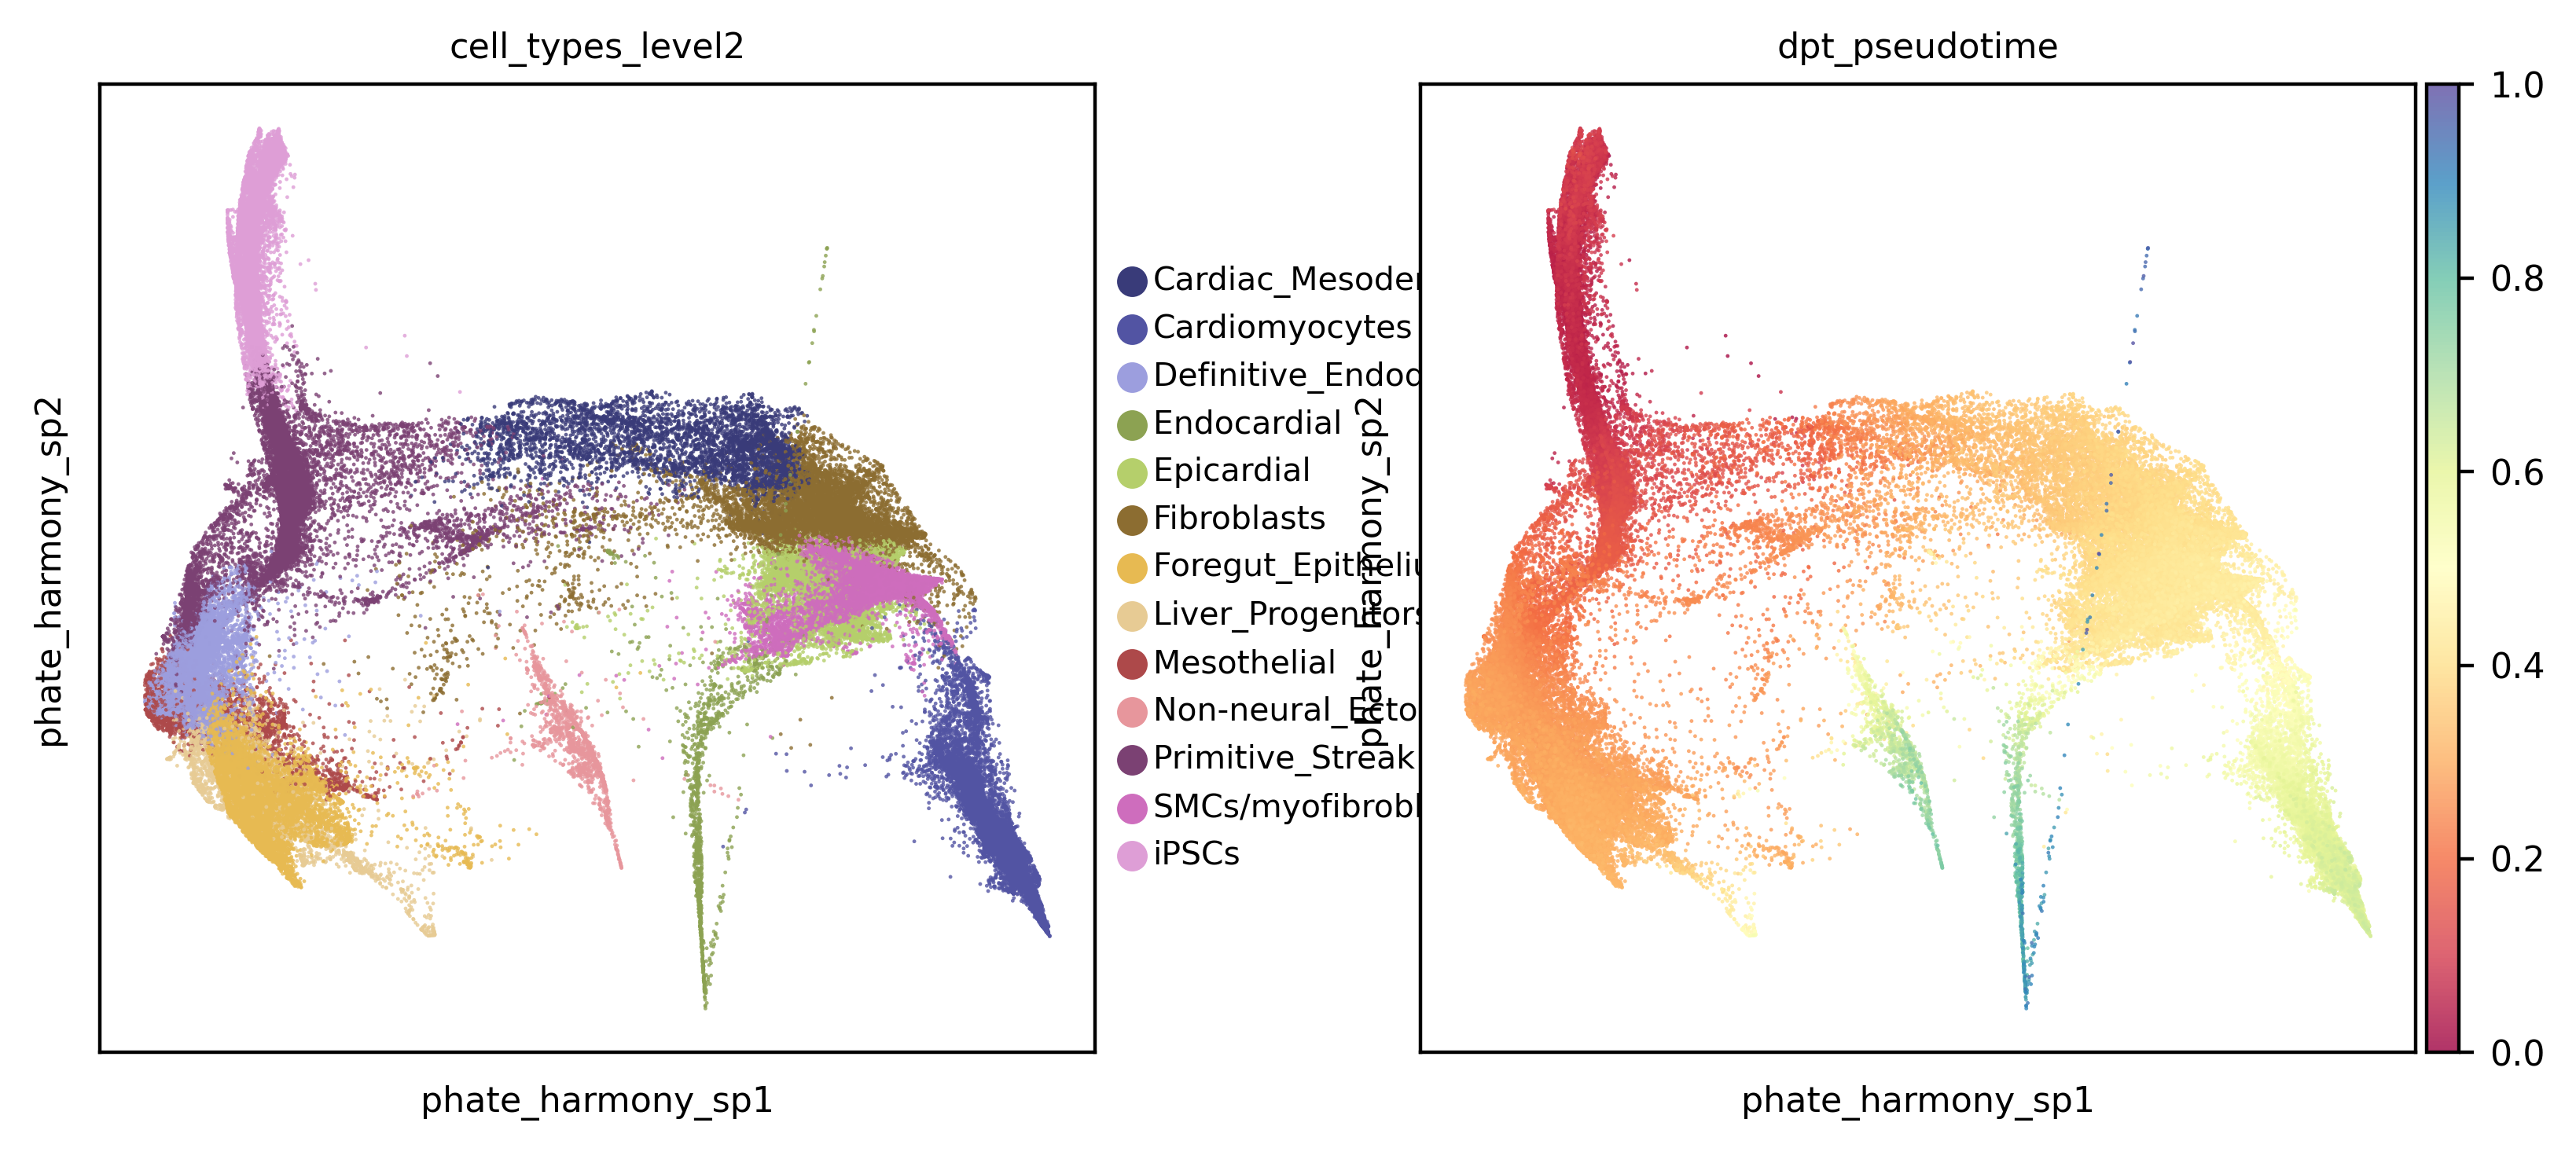

In [34]:
sc.set_figure_params(
    figsize=(4,4),
    fontsize=8,
    transparent=False,
    dpi=200
)
sc.pl.embedding(
    adata,
    basis='phate_harmony_sp',
    color=['cell_types_level2', 'dpt_pseudotime'], #,'pattern'
    # edges=True, edges_width=0.01,
    # legend_loc='on data', legend_fontsize=6, legend_fontoutline=0.75, #labels on plot
    palette='tab20b',
    cmap='Spectral',
    size=3, alpha=0.8,
    sort_order=True,
#     return_fig=True,
    ncols=3
)

# Save preprocessed object for future analyses (python & R)

In [35]:
# Save h5ad object for subsequent analyses
adata.write(
    # filename="data/pyobjs/scCO_v7-4.h5ad"
    filename="data/pyobjs/scCO_v1c.h5ad"
)